NETWORK_DATA

In [ ]:
 Explore the shape file given

Use NetworkX of Python to do the following 

Use the connectivity matrix to draw the graph (get an output of the graph)

Derive the distance matrix for the given connectivity matrix using the shape file (as per the coordinates given).

Explore the shape file given

In [ ]:
import geopandas as gpd
network = gpd.read_file('/content/repro_network.shp')
network.head()

,id,x,y,geometry
0,1,74.571,16.780,POINT (454294.076 1855242.105)
1,2,74.439,15.392,POINT (439794.765 1701787.921)
2,3,73.811,15.310,POINT (372380.094 1692923.993)
3,4,75.149,15.293,POINT (516023.380 1690752.861)
4,5,75.695,15.376,POINT (574517.841 1700002.347)


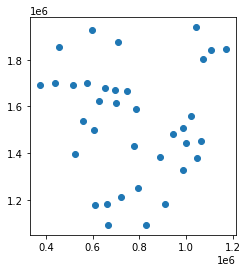

In [ ]:
network.plot()

In [ ]:
network.crs

<Projected CRS: EPSG:32243>
Name: WGS 72 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1972
- Ellipsoid: WGS 72
- Prime Meridian: Greenwich

In [ ]:
network['geometry'].head()

0    POINT (454294.076 1855242.105)
1    POINT (439794.765 1701787.921)
2    POINT (372380.094 1692923.993)
3    POINT (516023.380 1690752.861)
4    POINT (574517.841 1700002.347)
Name: geometry, dtype: geometry

Use NetworkX of Python to do the following 

Use the connectivity matrix to draw the graph (get an output of the graph)

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np

mydata = genfromtxt(r"/content/Updated Connectivity matrix.csv", delimiter=',')

In [ ]:
print(mydata)
print(type(mydata))

[[ 1. nan  1. ... nan nan nan]
 [ 2.  1. nan ... nan nan nan]
 [ 3. nan  1. ... nan nan  1.]
 ...
 [34. nan nan ... nan nan nan]
 [35. nan nan ... nan nan nan]
 [36. nan nan ... nan nan nan]]
<class 'numpy.ndarray'>


In [ ]:
adjacency = mydata[:,1:]
print(adjacency)

[[nan  1. nan ... nan nan nan]
 [ 1. nan  1. ... nan nan nan]
 [nan  1. nan ... nan nan  1.]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan  1. ... nan nan nan]]


In [ ]:
out_num = np.nan_to_num(adjacency) 
print ("output  number : ", out_num) 

output  number :  [[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [ ]:
out_num.shape

(36, 36)

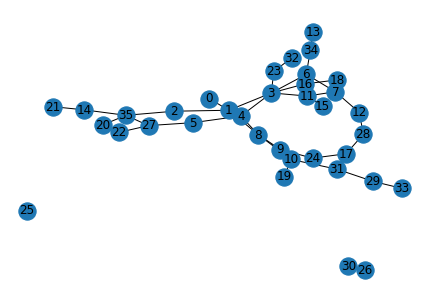

In [ ]:
G = nx.from_numpy_matrix(np.array(out_num))  
nx.draw(G, with_labels=True) 

Derive the distance matrix for the given connectivity matrix using the shape file (as per the coordinates given).

In [ ]:
import fiona
from shapely.geometry import shape
import numpy as np

path = '/content/repro_network.shp' #your points

points = fiona.open(path)

geoms = [ shape(feat["geometry"]) for feat in points ]

list_arrays = [ np.array((geom.xy[0][0], geom.xy[1][0])) for geom in geoms ]

for array in list_arrays:
    print(array)

[ 454294.07574028 1855242.10531839]
[ 439794.7654374  1701787.92064359]
[ 372380.09417693 1692923.99306029]
[ 516023.37981259 1690752.86113823]
[ 574517.84105464 1700002.347056  ]
[ 596541.09660564 1928516.60606049]
[ 605503.9301971  1500959.39616426]
[ 558949.95338375 1539179.1078344 ]
[ 650885.49420654 1680269.93890255]
[ 626330.38954885 1625303.68404402]
[ 697108.07806895 1671472.67793329]
[ 699338.28475329 1616653.25631665]
[ 748648.6522846  1668302.20522788]
[ 707594.84398052 1878152.21253373]
[ 786907.8937716  1588261.72862227]
[ 776076.89275404 1430878.44920143]
[ 886190.5486833  1382776.62427128]
[ 942135.00457785 1484305.74437783]
[ 986554.79554884 1507065.92923607]
[1070936.98938012 1802341.64737674]
[1105300.48724195 1841827.17555217]
[1042574.72805553 1939213.13022914]
[1172511.76342237 1845674.93787413]
[1021327.19034222 1560897.94632256]
[1062999.21749677 1453559.40120258]
[1000288.24616253 1443178.03541043]
[1044685.95354425 1378006.326569  ]
[ 987872.7091654  1327522.05

In [ ]:
list_arrays

[array([ 454294.07574028, 1855242.10531839]),
 array([ 439794.7654374 , 1701787.92064359]),
 array([ 372380.09417693, 1692923.99306029]),
 array([ 516023.37981259, 1690752.86113823]),
 array([ 574517.84105464, 1700002.347056  ]),
 array([ 596541.09660564, 1928516.60606049]),
 array([ 605503.9301971 , 1500959.39616426]),
 array([ 558949.95338375, 1539179.1078344 ]),
 array([ 650885.49420654, 1680269.93890255]),
 array([ 626330.38954885, 1625303.68404402]),
 array([ 697108.07806895, 1671472.67793329]),
 array([ 699338.28475329, 1616653.25631665]),
 array([ 748648.6522846 , 1668302.20522788]),
 array([ 707594.84398052, 1878152.21253373]),
 array([ 786907.8937716 , 1588261.72862227]),
 array([ 776076.89275404, 1430878.44920143]),
 array([ 886190.5486833 , 1382776.62427128]),
 array([ 942135.00457785, 1484305.74437783]),
 array([ 986554.79554884, 1507065.92923607]),
 array([1070936.98938012, 1802341.64737674]),
 array([1105300.48724195, 1841827.17555217]),
 array([1042574.72805553, 1939213.

In [ ]:
array1d=np.stack( list_arrays, axis=0 )

In [ ]:
array1d.shape

(36, 2)

In [ ]:
arr_2d = array1d.reshape(-1,2)

In [ ]:
print(arr_2d)

[[ 454294.07574028 1855242.10531839]
 [ 439794.7654374  1701787.92064359]
 [ 372380.09417693 1692923.99306029]
 [ 516023.37981259 1690752.86113823]
 [ 574517.84105464 1700002.347056  ]
 [ 596541.09660564 1928516.60606049]
 [ 605503.9301971  1500959.39616426]
 [ 558949.95338375 1539179.1078344 ]
 [ 650885.49420654 1680269.93890255]
 [ 626330.38954885 1625303.68404402]
 [ 697108.07806895 1671472.67793329]
 [ 699338.28475329 1616653.25631665]
 [ 748648.6522846  1668302.20522788]
 [ 707594.84398052 1878152.21253373]
 [ 786907.8937716  1588261.72862227]
 [ 776076.89275404 1430878.44920143]
 [ 886190.5486833  1382776.62427128]
 [ 942135.00457785 1484305.74437783]
 [ 986554.79554884 1507065.92923607]
 [1070936.98938012 1802341.64737674]
 [1105300.48724195 1841827.17555217]
 [1042574.72805553 1939213.13022914]
 [1172511.76342237 1845674.93787413]
 [1021327.19034222 1560897.94632256]
 [1062999.21749677 1453559.40120258]
 [1000288.24616253 1443178.03541043]
 [1044685.95354425 1378006.326569  ]
 

In [ ]:
arr_2d.shape

(36, 2)

Edge list 

In [ ]:
x1=[]
y1=[]
for i in range(36):
  for j in range(36):
    if out_num[i,j]==1:
      x1.append(i)
      y1.append(j)

 
          


In [ ]:
print(x1)

[0, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 13, 14, 14, 15, 16, 16, 17, 17, 17, 18, 18, 19, 20, 20, 21, 22, 22, 23, 23, 24, 24, 26, 27, 27, 27, 28, 28, 29, 29, 30, 31, 31, 31, 32, 33, 34, 34, 35, 35, 35, 35]


In [ ]:
print(y1)

[1, 0, 2, 3, 8, 1, 35, 1, 4, 6, 11, 16, 23, 3, 5, 8, 4, 27, 3, 7, 34, 6, 11, 12, 18, 1, 4, 9, 10, 8, 24, 8, 19, 31, 3, 7, 15, 7, 28, 34, 21, 35, 11, 3, 18, 24, 28, 31, 7, 16, 10, 22, 35, 14, 20, 27, 3, 32, 9, 17, 30, 5, 22, 35, 12, 17, 31, 33, 26, 10, 17, 29, 23, 29, 6, 13, 2, 14, 20, 27]


Distance matrix

In [ ]:
from math import sin, cos, sqrt, atan2, radians

distance=[]
count=0
matrix=np.empty((36,36))
for i in range(36):
  for j in range(36):
    
     for k in range(len(x1)):
          if x1[0]==i and y1[0]==j:


             point1=x1[0]
             point2=y1[0]
                                             
             p1=np.array(arr_2d[point1])
             p2=np.array(arr_2d[point2])
             dist = np.linalg.norm(p1 - p2)
      
             distance.append(dist)
             matrix[i,j]=dist
             del x1[0]
             del y1[0]
             count=count+1
             print(count)

          



    
  



      



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80


In [ ]:
print(matrix[0])
print(matrix[1])

[     0.         154137.65533921      0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.        ]
[1.54137655e+005 0.00000000e+000 6.79949051e+004 7.70232055e+004
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 2.12184635e+005 0.00000000e+000 0.00000000e+000 0.00000000e+000
 4.68193677e-310 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.0000

In [ ]:
print(matrix)

[[     0.         154137.65533921      0.         ...      0.
       0.              0.        ]
 [154137.65533921      0.          67994.90505442 ...      0.
       0.              0.        ]
 [     0.          67994.90505442      0.         ...      0.
       0.         754350.82501716]
 ...
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 [     0.              0.         754350.82501716 ...      0.
       0.              0.        ]]


In [ ]:
import pandas as pd
df=pd.DataFrame(matrix)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.000000,154137.655339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,154137.655339,0.000000,67994.905054,77023.205515,0.000000,0.000000,0.000000,0.000000,2.121846e+05,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,67994.905054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,754350.825017
3,0.000000,77023.205515,0.000000,0.000000,59221.237624,0.000000,209829.283571,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,4.681937e-310,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,59221.237624,0.000000,229573.061036,0.000000,0.000000,7.887577e+04,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,229573.061036,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,717171.443391,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,209829.283571,0.000000,0.000000,0.000000,60233.040080,4.681937e-310,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,438857.360116,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60233.040080,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,212184.634954,0.000000,0.000000,78875.765476,0.000000,0.000000,0.000000,0.000000e+00,60201.680524,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.020168e+04,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df.to_csv('/content/Distance_matrix.csv')

In [ ]:
df.shape

(36, 36)

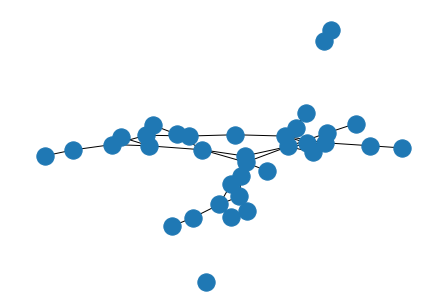

In [ ]:
K=nx.from_numpy_matrix(out_num)
nx.draw(K)
L=K.edges

In [ ]:
import numpy as np
d=np.array(df)


In [ ]:
from scipy.sparse.csgraph import minimum_spanning_tree
tree=minimum_spanning_tree(d)
print(tree)

  (1, 0)	154137.6553392075
  (1, 2)	67994.90505441865
  (3, 1)	77023.20551527764
  (3, 11)	197724.82344949164
  (3, 23)	521722.37812609744
  (4, 3)	59221.237624182526
  (5, 4)	229573.061035997
  (5, 27)	717171.4433914471
  (7, 6)	60233.04008006202
  (7, 12)	229474.11759316214
  (7, 18)	428808.99860277626
  (8, 4)	78875.76547624789
  (8, 10)	47052.30131968506
  (9, 8)	60201.680524075055
  (10, 19)	396074.16236771166
  (11, 7)	160346.89665775263
  (11, 15)	201000.2311356585
  (12, 28)	454357.1749356038
  (14, 21)	434203.1971814469
  (17, 31)	450637.1123227756
  (18, 16)	159752.3501470823
  (20, 22)	67321.32589815998
  (22, 27)	550067.2581702002
  (23, 32)	587566.5431361141
  (24, 17)	124713.65435733258
  (27, 35)	282738.3668307385
  (28, 17)	347994.86179379455
  (29, 31)	48920.897654520995
  (29, 33)	152191.40819128713
  (30, 26)	519778.46461693116
  (34, 6)	438857.3601160231
  (34, 13)	723080.2570103526
  (35, 14)	497026.5471587883


In [ ]:
type(tree)

scipy.sparse.csr.csr_matrix

In [ ]:
print(tree.toarray())

[[     0.              0.              0.         ...      0.
       0.              0.        ]
 [154137.65533921      0.          67994.90505442 ...      0.
       0.              0.        ]
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 ...
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 [     0.              0.              0.         ...      0.
       0.              0.        ]]


In [ ]:
import scipy as sp
import scipy.sparse  # call as sp.sparse
G = nx.from_scipy_sparse_matrix(tree)

In [ ]:
type(G)

networkx.classes.graph.Graph

In [ ]:
print(G)

Graph with 36 nodes and 33 edges
